<img src="ost-logo.png" width="240" align="right"/>
<div style="text-align: left"> <b> Deep Reinforcement Learning Projekt</b> <br>Rico Good <br> Erich Meyer <br>
19.06.2021
</div>

# Part A - Classic tabular reinforcement learning

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
class Cliff:
    def __init__(self, rows=4, cols=12):
        self.rows = rows
        self.cols = cols
        self.start = (rows - 1, 0)
        self.goal = (rows - 1, cols - 1)
        self.end = False
        self.position = self.start
        self.board = np.zeros([rows, cols])
        self.board[rows - 1, 1:(cols - 1)] = -1
    
    def step(self, action):
        if action == 0: # up
            next_position = (self.position[0] - 1, self.position[1])
        elif action == 1: # down
            next_position = (self.position[0] + 1, self.position[1])
        elif action == 2: # left
            next_position = (self.position[0], self.position[1] - 1)
        else: # right
            next_position = (self.position[0], self.position[1] + 1)
        
        if next_position[0] >= 0 and next_position[0] <= self.rows - 1 and next_position[1] >= 0 and next_position[1] <= self.cols - 1:
                self.position = next_position

        if self.position == self.goal:
            self.end = True
            print("yeeee 💃🎯🏆")
        if self.board[self.position] == -1:
            self.end = True
            print("ohhw noou abaghait💀👻")
        
        return self.position, self.__reward(), self.end

    def reset(self):
        self.end = False
        self.position = self.start

    def __reward(self):
        if self.board[self.position] == -1:
            return -100
        if self.position == self.goal:
            return 0;
        return -1



## SARSA epsilon greedy

In [3]:
class Agent:
    def __init__(self, epsilon=0.2, alpha=0.1, gamma=0.95):
        self.cliff = Cliff()
        self.epsilon = epsilon
        self.alpha = alpha
        self.gamma = gamma
        self.position = self.cliff.start
        self.actions = [0, 1, 2, 3]
        self.total_reward = 0
        self.Q = {}
        self.rewards = []
        for i in range(self.cliff.rows):
            for j in range(self.cliff.cols):
                self.Q[(i, j)] = {}
                for a in self.actions:
                    self.Q[(i, j)][a] = 0

    def choose_action(self, state):
        action = 0
        if np.random.uniform(0, 1) < self.epsilon:
            action = np.random.choice(self.actions)
        else:
            action = np.argmax(list(self.Q[state].values()))
        return action

    def update(self, state, action, reward, state2, action2):
        predict = self.Q[state][action]
        target = reward + self.gamma * self.Q[state2][action2]
        self.Q[state][action] = self.Q[state][action] + self.alpha * (target - predict)

    def reset(self):
        self.cliff.reset()
        self.position = self.cliff.start

    def learn(self, n_episodes):

        for episode in range(n_episodes):
            self.reset()
            reward = 0
            state = self.position
            action = self.choose_action(state)
            states = []
            
            while(True):
                # get next state
                state2, r, end = self.cliff.step(action)
                
                # decrease epsilon
                self.epsilon *= 0.9999
        
                # choose next action
                action2 = self.choose_action(state2)
                
                # learn Q value
                self.update(state, action, r, state2, action2)
                
                # set new state & action as current
                state = state2
                action = action2
                
                # append state for route monitoring
                states.append(state)
                
                # update reward
                reward += r
                
                # leave loop if state is terminal
                if end:
                    break
                
            self.total_reward += reward
            self.rewards.append(reward)
            print("episode {} finished with reward {}".format(episode, reward))

        print("total reward: {}".format(self.total_reward))
        print("mean: {}".format(self.total_reward / n_episodes))


In [4]:
agent = Agent()
agent.learn(5000)

nished with reward -14
yeeee 💃🎯🏆
episode 4609 finished with reward -14
yeeee 💃🎯🏆
episode 4610 finished with reward -14
yeeee 💃🎯🏆
episode 4611 finished with reward -14
yeeee 💃🎯🏆
episode 4612 finished with reward -14
yeeee 💃🎯🏆
episode 4613 finished with reward -14
yeeee 💃🎯🏆
episode 4614 finished with reward -14
yeeee 💃🎯🏆
episode 4615 finished with reward -14
yeeee 💃🎯🏆
episode 4616 finished with reward -14
yeeee 💃🎯🏆
episode 4617 finished with reward -14
yeeee 💃🎯🏆
episode 4618 finished with reward -14
yeeee 💃🎯🏆
episode 4619 finished with reward -14
yeeee 💃🎯🏆
episode 4620 finished with reward -14
yeeee 💃🎯🏆
episode 4621 finished with reward -14
yeeee 💃🎯🏆
episode 4622 finished with reward -14
yeeee 💃🎯🏆
episode 4623 finished with reward -14
yeeee 💃🎯🏆
episode 4624 finished with reward -14
yeeee 💃🎯🏆
episode 4625 finished with reward -14
yeeee 💃🎯🏆
episode 4626 finished with reward -14
yeeee 💃🎯🏆
episode 4627 finished with reward -14
yeeee 💃🎯🏆
episode 4628 finished with reward -14
yeeee 💃🎯🏆
episode

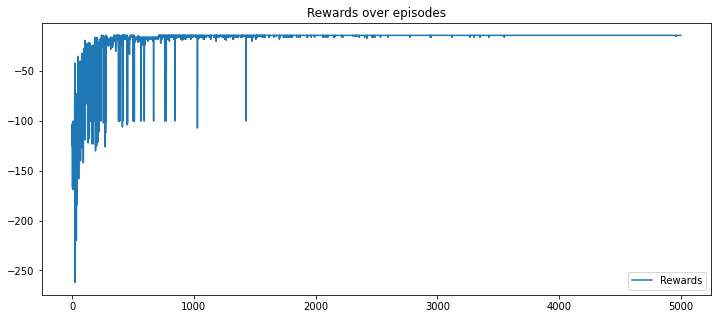

In [5]:
plt.figure(figsize=(12, 5))
plt.plot(agent.rewards, label="Rewards")
plt.title("Rewards over episodes")
plt.legend()

## SARSA(λ) epsilon greedy

In [6]:
class Agent:
    def __init__(self, epsilon=0.2, alpha=0.1, gamma=0.95):
        self.cliff = Cliff()
        self.epsilon = epsilon
        self.alpha = alpha
        self.gamma = gamma
        self.position = self.cliff.start
        self.actions = [0, 1, 2, 3]
        self.total_reward = 0
        self.Q = {}
        self.e = {}
        self.delta = 0
        self.lamb = 1
        self.rewards = []
        for i in range(self.cliff.rows):
            for j in range(self.cliff.cols):
                self.Q[(i, j)] = {}
                self.e[(i, j)] = {}
                for a in self.actions:
                    self.Q[(i, j)][a] = -np.random.random()
                    self.e[(i, j)][a] = 0

    def choose_action(self, state):
        action = 0
        if np.random.uniform(0, 1) < self.epsilon:
            action = np.random.choice(self.actions)
        else:
            action = np.argmax(list(self.Q[state].values()))
        return action

    def update_e(self, state, action, reward, state2, action2):
        self.delta = reward + self.gamma * self.Q[state2][action2] - self.Q[state][action]
        self.e[state][action] = self.e[state][action] + 1

    def update_all(self, state, action):
        self.Q[state][action] = self.Q[state][action] + self.alpha * self.delta * self.e[state][action]
        self.e[state][action] = self.gamma * self.lamb * self.e[state][action]

    def reset(self):
        self.cliff.reset()
        self.position = self.cliff.start

    def learn(self, n_episodes):
        for episode in range(n_episodes):
            self.reset()
            reward = 0
            state = self.position
            action = 0
            states = []

            while (True):
                # get next state
                state2, r, end = self.cliff.step(action)

                # decrease espilon and lambda
                self.epsilon *= 0.9999
                self.lamb *= 0.9999

                # choose next action
                action2 = self.choose_action(state2)

                # learn Q value
                self.update_e(state, action, r, state2, action2)

                # update all state-action pairs
                for state in self.Q:
                    for action in self.Q[state]:
                        self.update_all(state, action)
                        
                # set new state & action as current
                state = state2
                action = action2

                # append state for route monitoring
                states.append(state)

                # update reward
                reward += r

                # leave loop if state is terminal
                if end:
                    break

            self.total_reward += reward
            self.rewards.append(reward)
            print("episode {} finished with reward {}".format(episode, reward))

        print("total reward: {}".format(self.total_reward))
        print("mean: {}".format(self.total_reward / n_episodes))


In [7]:
agent_lambda = Agent()
agent_lambda.learn(5000)

nished with reward -16
yeeee 💃🎯🏆
episode 4609 finished with reward -16
yeeee 💃🎯🏆
episode 4610 finished with reward -16
yeeee 💃🎯🏆
episode 4611 finished with reward -16
yeeee 💃🎯🏆
episode 4612 finished with reward -16
yeeee 💃🎯🏆
episode 4613 finished with reward -16
yeeee 💃🎯🏆
episode 4614 finished with reward -16
yeeee 💃🎯🏆
episode 4615 finished with reward -16
yeeee 💃🎯🏆
episode 4616 finished with reward -16
yeeee 💃🎯🏆
episode 4617 finished with reward -16
yeeee 💃🎯🏆
episode 4618 finished with reward -16
yeeee 💃🎯🏆
episode 4619 finished with reward -16
yeeee 💃🎯🏆
episode 4620 finished with reward -16
yeeee 💃🎯🏆
episode 4621 finished with reward -16
yeeee 💃🎯🏆
episode 4622 finished with reward -16
yeeee 💃🎯🏆
episode 4623 finished with reward -16
yeeee 💃🎯🏆
episode 4624 finished with reward -16
yeeee 💃🎯🏆
episode 4625 finished with reward -16
yeeee 💃🎯🏆
episode 4626 finished with reward -16
yeeee 💃🎯🏆
episode 4627 finished with reward -16
yeeee 💃🎯🏆
episode 4628 finished with reward -16
yeeee 💃🎯🏆
episode

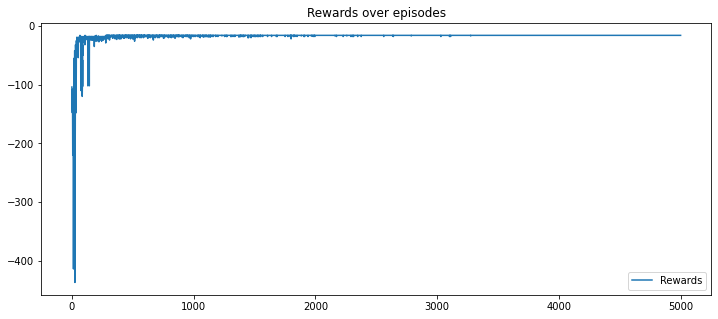

In [8]:
plt.figure(figsize=(12, 5))
plt.plot(agent_lambda.rewards, label="Rewards")
plt.title("Rewards over episodes")
plt.legend()

## SARSA(λ) softmax

In [15]:
class Agent:
    def __init__(self, alpha=0.1, gamma=0.95, T=10):
        self.cliff = Cliff()
        self.alpha = alpha
        self.gamma = gamma
        self.position = self.cliff.start
        self.actions = [0, 1, 2, 3]
        self.total_reward = 0
        self.rewards = []
        self.Q = {}
        self.e = {}
        self.delta = 0
        self.lamb = 1
        self.T = T
        self.rng = np.random.default_rng()
        for i in range(self.cliff.rows):
            for j in range(self.cliff.cols):
                self.Q[(i, j)] = {}
                self.e[(i, j)] = {}
                for a in self.actions:
                    self.Q[(i, j)][a] = -np.random.random()
                    self.e[(i, j)][a] = 0

    def softmax(self, state):
        expQT = np.exp(np.divide(list(self.Q[state].values()), self.T))
        probs = np.divide(expQT, np.sum(expQT))
        action = self.rng.choice(self.actions, p=probs)
        return action

    def update_e(self, state, action, reward, state2, action2):
        self.delta = reward + self.gamma * self.Q[state2][action2] - self.Q[
            state][action]
        self.e[state][action] = self.e[state][action] + 1

    def update_all(self, state, action):
        self.Q[state][action] = self.Q[state][
            action] + self.alpha * self.delta * self.e[state][action]
        self.e[state][action] = self.gamma * self.lamb * self.e[state][action]

    def reset(self):
        self.cliff.reset()
        self.position = self.cliff.start

    def learn(self, n_episodes):
        for episode in range(n_episodes):
            self.reset()
            reward = 0
            state = self.position
            action = 0
            states = []

            while (True):
                # get next state
                state2, r, end = self.cliff.step(action)

                # decrease temp and lambda
                self.T *= 0.99999
                self.lamb *= 0.9999

                # choose next action
                action2 = self.softmax(state2)

                # update delta and e values
                self.update_e(state, action, r, state2, action2)

                # update all state-action pairs
                for state in self.Q:
                    for action in self.Q[state]:
                        self.update_all(state, action)

                # set new state & action as current
                state = state2
                action = action2

                # append state for route monitoring
                states.append(state)

                # update reward
                reward += r

                # leave loop if state is terminal
                if end:
                    break

            self.total_reward += reward
            self.rewards.append(reward)
            print("episode {} finished with reward {}".format(episode, reward))

        print("total reward: {}".format(self.total_reward))
        print("mean: {}".format(self.total_reward / n_episodes))

In [16]:
agent_lambda_softmax = Agent(T=7)
agent_lambda_softmax.learn(10000)

ished with reward -12
yeeee 💃🎯🏆
episode 9609 finished with reward -18
yeeee 💃🎯🏆
episode 9610 finished with reward -12
yeeee 💃🎯🏆
episode 9611 finished with reward -13
yeeee 💃🎯🏆
episode 9612 finished with reward -12
yeeee 💃🎯🏆
episode 9613 finished with reward -15
yeeee 💃🎯🏆
episode 9614 finished with reward -12
yeeee 💃🎯🏆
episode 9615 finished with reward -13
yeeee 💃🎯🏆
episode 9616 finished with reward -13
yeeee 💃🎯🏆
episode 9617 finished with reward -12
yeeee 💃🎯🏆
episode 9618 finished with reward -12
yeeee 💃🎯🏆
episode 9619 finished with reward -12
yeeee 💃🎯🏆
episode 9620 finished with reward -12
yeeee 💃🎯🏆
episode 9621 finished with reward -14
yeeee 💃🎯🏆
episode 9622 finished with reward -12
yeeee 💃🎯🏆
episode 9623 finished with reward -12
yeeee 💃🎯🏆
episode 9624 finished with reward -12
yeeee 💃🎯🏆
episode 9625 finished with reward -12
yeeee 💃🎯🏆
episode 9626 finished with reward -14
yeeee 💃🎯🏆
episode 9627 finished with reward -12
yeeee 💃🎯🏆
episode 9628 finished with reward -12
yeeee 💃🎯🏆
episode 

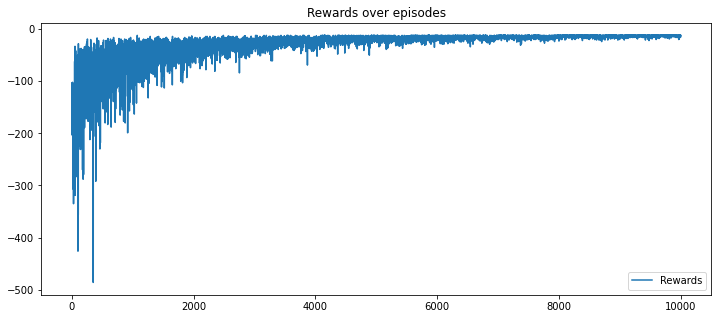

In [17]:
plt.figure(figsize=(12, 5))
plt.plot(agent_lambda_softmax.rewards, label="Rewards")
plt.title("Rewards over episodes")
plt.legend()